#**CMSC 320 Group Project: World Inflation Data**

---



## **1. Header**

Title: World Inflation Data \\
Spring 2025 Data Science Project \\
Names: Erica Honadel, Livia Earl, Abhyuday Srivatsa, Tony Zhang, Rohan Tadisetty

**Contributions:** \\
Everyone: Helped worked on the project ideas (A). \\
Livia Earl: She did the dataset curation and preprocessing (B), where the data was cleaned (deleting rows because they were missing not at random). Additionally, she did the data exploration and summary statistics (C) to get a better understanding of the dataset and the final tutorial report creation (G). The report includes finding helpful links and editing the Jupyter Notebook. \\
Erica Honadel: She did one of the statistical tests (ANOVA) (C). She also did the visualization (F) for ML 1 and ML 2 algorithms. \\
Rohan Tadisetty: He did the visualizations for each of the statistical tests (F) and the ML random forest model (ML 3) (D and E). \\
Abhyuday Srivatsa: He did one of the statistical tests (GDP: Pearson Correlation) (C) He also did the visualization (F) for ML 3 algorithm. \\
Tony Zhang: He did one of the statistical tests (Corruption Index: Linear Regression) (C) and the ML k-means clustering models (ML 1 and ML 2) (D and E).


## **2. Introduction**

Our topic is exploring the Global Inflation Rates and how they relate to corruption perception index (CPI) and GDP from 1960 to present. [Inflation](https://www.pgpf.org/article/what-is-inflation-and-why-does-it-matter/) is the rate at which prices for goods and services increase. It often occurs at a rate of 2% per year. Inflation affects many different facets of the economy. It is important to understand how rapid increase of these rates can lead to negative outcomes like increased interest on national debt. Inflation also reflects the state of the economy. For example, lower inflation rates can be seen when there is high unemployment and economic recession. On the other hand, higher inflation rates normally correlate to low unemployment. For these reasons and more, it is important for data scientists to examine past inflation rates to help better understand the future.

Some questions we want to answer: Were different regions affected differently during the Great Recession from 2007 to 2009? Is there a linear relationship between a country’s corruption perception index and its inflation? Is there a correlation between a country’s inflation rate and GDP? Which countries and subregions have similar inflation trends? Can we accurately predict the 2024 inflation based on previous inflation rates, GDP, and region? It is important to answer these to have a better understanding of the global economy and how countries and regions are similar and different. We can use these patterns to predict the future economy.

## **3. Data Curation**

**Global Inflation Data:** https://www.kaggle.com/datasets/fredericksalazar/global-inflation-rate-1960-present \\
This includes data from 1960 to 2023 with the inflation rate of each country for each year. It also includes the subregions. \\
**Global Corruption Data:** https://www.kaggle.com/datasets/tr1gg3rtrash/global-corruption-index \\
This dataset has the corruption index for 180 countries from 2013 to 2021. \\
**GDP:** https://www.kaggle.com/datasets/alejopaullier/-gdp-by-country-1999-2022 \\
This dataset includes 180 countries and their GDPs for each year from 1999 to 2022. \\
**Inflation GDP Data:** Merged Dataset from the ones above including inflation and GDP.

####Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import scipy
from scipy.stats import sem
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

####Turning dataset into dataframe

In [2]:
df = pd.read_csv('/content/sample_data/global_inflation_countries.csv')
display(df)

,country_code,country_name,region,sub_region,intermediate_region,indicator_code,indicator_name,year,inflation_rate
0,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1960,0.000000
1,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1961,0.000000
2,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1962,0.000000
3,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1963,0.000000
4,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1964,0.000000
...,...,...,...,...,...,...,...,...,...
13755,ZWE,ZIMBABWE,ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRE...,SUB-SAHARAN AFRICA,EASTERN AFRICA,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",2019,255.304991
13756,ZWE,ZIMBABWE,ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRE...,SUB-SAHARAN AFRICA,EASTERN AFRICA,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",2020,557.201817
13757,ZWE,ZIMBABWE,ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRE...,SUB-SAHARAN AFRICA,EASTERN AFRICA,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",2021,98.546105
13758,ZWE,ZIMBABWE,ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRE...,SUB-SAHARAN AFRICA,EASTERN AFRICA,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",2022,104.705171


####Basic database information

In [3]:
display(df.shape)

(13760, 9)

In [4]:
display(df.columns)

Index(['country_code', 'country_name', 'region', 'sub_region',
       'intermediate_region', 'indicator_code', 'indicator_name', 'year',
       'inflation_rate'],
      dtype='object')

In [5]:
display(df.dtypes)

,0
country_code,object
country_name,object
region,object
sub_region,object
intermediate_region,object
indicator_code,object
indicator_name,object
year,int64
inflation_rate,float64


The number of unique values for each important column (not including inflation).

In [6]:
display(df['country_name'].nunique()) #215 countries
display(df['sub_region'].nunique()) #17 sub regions
display(df['indicator_code'].nunique()) #1 indicator code
df.isna().any()

215

17

1

,0
country_code,False
country_name,False
region,True
sub_region,False
intermediate_region,True
indicator_code,False
indicator_name,False
year,False
inflation_rate,False


####Data Cleaning

Deleting 'region' column because it is just 'sub_region' column but in Spanish and 'indicator_name' because there is only one (in Spanish) and 'indicator_code' can cover it

In [7]:
df.drop(columns= ['region', 'indicator_name'], inplace=True)
display(df)

,country_code,country_name,sub_region,intermediate_region,indicator_code,year,inflation_rate
0,AFG,AFGANISTAN,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,1960,0.000000
1,AFG,AFGANISTAN,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,1961,0.000000
2,AFG,AFGANISTAN,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,1962,0.000000
3,AFG,AFGANISTAN,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,1963,0.000000
4,AFG,AFGANISTAN,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,1964,0.000000
...,...,...,...,...,...,...,...
13755,ZWE,ZIMBABWE,SUB-SAHARAN AFRICA,EASTERN AFRICA,FP.CPI.TOTL.ZG,2019,255.304991
13756,ZWE,ZIMBABWE,SUB-SAHARAN AFRICA,EASTERN AFRICA,FP.CPI.TOTL.ZG,2020,557.201817
13757,ZWE,ZIMBABWE,SUB-SAHARAN AFRICA,EASTERN AFRICA,FP.CPI.TOTL.ZG,2021,98.546105
13758,ZWE,ZIMBABWE,SUB-SAHARAN AFRICA,EASTERN AFRICA,FP.CPI.TOTL.ZG,2022,104.705171


We must deal with missing 'intermediate_region' values. They are MNAR and most values are missing, so we will delete the column and only use the 'sub_region'.

In [8]:
grouped_df = df.groupby(['sub_region', 'intermediate_region'])[['sub_region', 'intermediate_region']] #we see that the missing values are directly connected to the 'sub_region'
for key, item in grouped_df:
    print(grouped_df.get_group(key), "\n\n")

                            sub_region intermediate_region
320    LATIN AMERICA AND THE CARIBBEAN           CARIBBEAN
321    LATIN AMERICA AND THE CARIBBEAN           CARIBBEAN
322    LATIN AMERICA AND THE CARIBBEAN           CARIBBEAN
323    LATIN AMERICA AND THE CARIBBEAN           CARIBBEAN
324    LATIN AMERICA AND THE CARIBBEAN           CARIBBEAN
...                                ...                 ...
12859  LATIN AMERICA AND THE CARIBBEAN           CARIBBEAN
12860  LATIN AMERICA AND THE CARIBBEAN           CARIBBEAN
12861  LATIN AMERICA AND THE CARIBBEAN           CARIBBEAN
12862  LATIN AMERICA AND THE CARIBBEAN           CARIBBEAN
12863  LATIN AMERICA AND THE CARIBBEAN           CARIBBEAN

[1408 rows x 2 columns] 


                           sub_region intermediate_region
1280  LATIN AMERICA AND THE CARIBBEAN     CENTRAL AMERICA
1281  LATIN AMERICA AND THE CARIBBEAN     CENTRAL AMERICA
1282  LATIN AMERICA AND THE CARIBBEAN     CENTRAL AMERICA
1283  LATIN AMERICA AND THE CARI

Deleting 'intermediate_region' column

In [9]:
#we cannot infer the missing values. They are MNAR. Since so many are missing there is no need to keep this column.
df.drop(columns= ['intermediate_region'], inplace=True)
display(df)

,country_code,country_name,sub_region,indicator_code,year,inflation_rate
0,AFG,AFGANISTAN,SOUTHERN ASIA,FP.CPI.TOTL.ZG,1960,0.000000
1,AFG,AFGANISTAN,SOUTHERN ASIA,FP.CPI.TOTL.ZG,1961,0.000000
2,AFG,AFGANISTAN,SOUTHERN ASIA,FP.CPI.TOTL.ZG,1962,0.000000
3,AFG,AFGANISTAN,SOUTHERN ASIA,FP.CPI.TOTL.ZG,1963,0.000000
4,AFG,AFGANISTAN,SOUTHERN ASIA,FP.CPI.TOTL.ZG,1964,0.000000
...,...,...,...,...,...,...
13755,ZWE,ZIMBABWE,SUB-SAHARAN AFRICA,FP.CPI.TOTL.ZG,2019,255.304991
13756,ZWE,ZIMBABWE,SUB-SAHARAN AFRICA,FP.CPI.TOTL.ZG,2020,557.201817
13757,ZWE,ZIMBABWE,SUB-SAHARAN AFRICA,FP.CPI.TOTL.ZG,2021,98.546105
13758,ZWE,ZIMBABWE,SUB-SAHARAN AFRICA,FP.CPI.TOTL.ZG,2022,104.705171


####Summary Statistics

In [10]:
df.describe()

,year,inflation_rate
count,13760.000000,13760.000000
mean,1991.500000,14.733366
std,18.473624,258.045563
min,1960.000000,-17.640424
25%,1975.750000,0.000000
50%,1991.500000,1.807483
75%,2007.250000,6.694660
max,2023.000000,23773.131774


We have finished cleaning the data. Now we will complete the statistical methods.

## **4. Exploratory Data Analysis**

#### **(1) The first statistical method: ANOVA**

The Great Recession was an economic crisis that lasted from late 2007 until mid 2009. We plan on investigating if different regions were affected differently during this recession by running an ANOVA.

H0: The average inflation rate between 2007 and 2009 is equal between all regions.

Ha: The average inflation rate between 2007 and 2009 of at least one region differs from the mean of the other regions.

In [11]:
df_filtered = df[df['year'].between(2007,2009)]
avg = df_filtered.groupby('country_name')['inflation_rate'].mean()
avg = df_filtered.merge(avg, on='country_name')
avg = avg.rename(columns={'inflation_rate_y': 'average_inflation_rate_2007_2009'})
avg = avg.drop_duplicates('country_name')
avg = avg.drop(columns=['inflation_rate_x', 'year'])

#ask group mems
avg = avg[avg['average_inflation_rate_2007_2009'] != 0]
avg = avg.reset_index()

display(avg)

,index,country_code,country_name,sub_region,indicator_code,average_inflation_rate_2007_2009
0,0,AFG,AFGANISTAN,SOUTHERN ASIA,FP.CPI.TOTL.ZG,9.429358
1,3,ALB,ALBANIA,SOUTHERN EUROPE,FP.CPI.TOTL.ZG,2.840158
2,6,DEU,ALEMANIA,WESTERN EUROPE,FP.CPI.TOTL.ZG,1.746488
3,12,AGO,ANGOLA,SUB-SAHARAN AFRICA,FP.CPI.TOTL.ZG,12.819204
4,15,ATG,ANTIGUA Y BARBUDA,LATIN AMERICA AND THE CARIBBEAN,FP.CPI.TOTL.ZG,2.066566
...,...,...,...,...,...,...
180,627,VUT,VANUATU,MELANESIA,FP.CPI.TOTL.ZG,4.358088
181,630,VEN,VENEZUELA,LATIN AMERICA AND THE CARIBBEAN,FP.CPI.TOTL.ZG,9.026980
182,633,VNM,VIET NAM,SOUTH-EASTERN ASIA,FP.CPI.TOTL.ZG,12.725627
183,636,YEM,"YEMEN, REP. DEL",WESTERN ASIA,FP.CPI.TOTL.ZG,10.763045


ANOVA Help: https://www.geeksforgeeks.org/how-to-perform-a-one-way-anova-in-python/

In [12]:
south_asia = avg[avg['sub_region'] == "SOUTHERN ASIA"]['average_inflation_rate_2007_2009']
aus = avg[avg['sub_region'] == "AUSTRALIA AND NEW ZEALAND"]['average_inflation_rate_2007_2009']
central_asia = avg[avg['sub_region'] == "CENTRAL ASIA"]['average_inflation_rate_2007_2009']
eastern_europe = avg[avg['sub_region'] == "EASTERN EUROPE"]['average_inflation_rate_2007_2009']
eastern_asia = avg[avg['sub_region'] == "EASTERN ASIA"]['average_inflation_rate_2007_2009']
latin = avg[avg['sub_region'] == "LATIN AMERICA AND THE CARIBBEAN"]['average_inflation_rate_2007_2009']
melanesia = avg[avg['sub_region'] == "MELANESIA"]['average_inflation_rate_2007_2009']
micronesia = avg[avg['sub_region'] == "MICRONESIA"]['average_inflation_rate_2007_2009']
northern_africa = avg[avg['sub_region'] == "NORTHERN AFRICA"]['average_inflation_rate_2007_2009']
northern_america = avg[avg['sub_region'] == "NORTHERN AMERICA"]['average_inflation_rate_2007_2009']
northern_europe = avg[avg['sub_region'] == "NORTHERN EUROPE"]['average_inflation_rate_2007_2009']
polynesia = avg[avg['sub_region'] == "POLYNESIA"]['average_inflation_rate_2007_2009']
south_eastern_asia = avg[avg['sub_region'] == "SOUTH-EASTERN ASIA"]['average_inflation_rate_2007_2009']
southern_europe = avg[avg['sub_region'] == "SOUTHERN EUROPE"]['average_inflation_rate_2007_2009']
sub_africa = avg[avg['sub_region'] == "SUB-SAHARAN AFRICA"]['average_inflation_rate_2007_2009']
western_europe = avg[avg['sub_region'] == "WESTERN EUROPE"]['average_inflation_rate_2007_2009']
western_asia = avg[avg['sub_region'] == "WESTERN ASIA"]['average_inflation_rate_2007_2009']

print(scipy.stats.f_oneway(south_asia, aus, central_asia, eastern_europe, eastern_asia, latin, melanesia, micronesia, northern_africa, northern_america, northern_europe, polynesia, south_eastern_asia, southern_europe, sub_africa, western_asia, western_europe))

F_onewayResult(statistic=np.float64(3.2211998066318146), pvalue=np.float64(7.405013178965147e-05))


In [13]:
tukey = scipy.stats.tukey_hsd(south_asia, aus, central_asia, eastern_europe, eastern_asia, latin, melanesia, micronesia, northern_africa, northern_america, northern_europe, polynesia, south_eastern_asia, southern_europe, sub_africa, western_asia, western_europe)

mapping = {
    '0' : 'Southern Asia',
    '1' : 'Australia',
    '2' : 'Central Asia',
    '3' : 'Eastern Europe',
    '4' : 'Eastern Asia',
    '5' : 'Latin America',
    '6' : 'Melanesia',
    '7' : 'Micronesia',
    '8' : 'Northern Africa',
    '9' : 'Northern America',
    '10' : 'Northern Europe',
    '11' : 'Polynesia',
    '12' : 'South-Eastern Asia',
    '13' : 'Southern Europe',
    '14' : 'Sub-Saharan Africa',
    '15' : 'Western Asia',
    '16' : 'Western Europe'
}

for i in range(len(tukey.pvalue)):
  for j in range(i+1, len(tukey.pvalue[i])):
    if tukey.pvalue[i][j] < 0.05:
      print(mapping[str(i)], 'and', mapping[str(j)])


Southern Asia and Southern Europe
Southern Asia and Western Europe
Central Asia and Southern Europe
Central Asia and Western Europe
Southern Europe and Sub-Saharan Africa
Sub-Saharan Africa and Western Europe


First conclusion: The ANOVA yielded a p-value of less than 0.05, which means that the null hypothesis should be rejected, indicating that the means are not the same across different regions. The post-hoc Tukey shows that there is a statstically significant difference between Soutern Asia and Southern Europe, Southern Asia and Western Europe, Central Asia and Southern Europe, Central Asia and Western Europe, Southern Europe and Sub-Saharan Africa, & Sub-Saharan Africa and Western Europe.

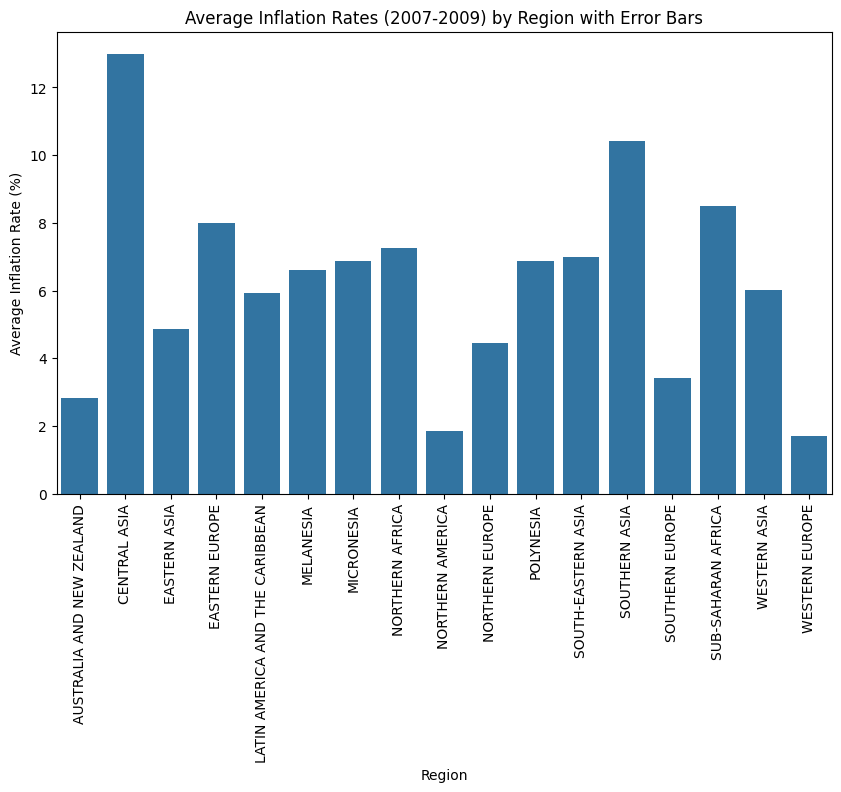

In [14]:
region_avg = avg.groupby("sub_region")["average_inflation_rate_2007_2009"].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=region_avg.index, y=region_avg, capsize=2)

plt.xticks(rotation=90)

plt.xlabel("Region")
plt.ylabel("Average Inflation Rate (%)")
plt.title("Average Inflation Rates (2007-2009) by Region with Error Bars")

plt.show()

#### **(2) The second statistical method: Linear Regression**

This linear regression explores the correlation between a country's corruption level (corruption perception index or CPI) and its effect on inflation.

H0: Corruption perception index has no effect on inflation.

HA: Corruption perception index does have an effect on inflation.

,country_code,country_name,sub_region,indicator_code,year,inflation_rate
52,AFG,Afghanistan,SOUTHERN ASIA,FP.CPI.TOTL.ZG,2012,6.441213
53,AFG,Afghanistan,SOUTHERN ASIA,FP.CPI.TOTL.ZG,2013,7.385772
54,AFG,Afghanistan,SOUTHERN ASIA,FP.CPI.TOTL.ZG,2014,4.673996
55,AFG,Afghanistan,SOUTHERN ASIA,FP.CPI.TOTL.ZG,2015,-0.661709
56,AFG,Afghanistan,SOUTHERN ASIA,FP.CPI.TOTL.ZG,2016,4.383892
...,...,...,...,...,...,...
13753,ZWE,Zimbabwe,SUB-SAHARAN AFRICA,FP.CPI.TOTL.ZG,2017,0.893962
13754,ZWE,Zimbabwe,SUB-SAHARAN AFRICA,FP.CPI.TOTL.ZG,2018,10.618866
13755,ZWE,Zimbabwe,SUB-SAHARAN AFRICA,FP.CPI.TOTL.ZG,2019,255.304991
13756,ZWE,Zimbabwe,SUB-SAHARAN AFRICA,FP.CPI.TOTL.ZG,2020,557.201817


,country_name,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012
0,Denmark,88,88,87,88,88,90,91,92,91,90
1,New Zealand,88,88,87,87,89,90,91,91,91,90
2,Finland,88,85,86,85,85,89,90,89,89,90
3,Singapore,85,85,85,85,84,84,85,84,86,87
4,Sweden,85,85,85,85,84,88,89,87,89,88
...,...,...,...,...,...,...,...,...,...,...,...
175,Yemen,16,15,15,14,16,14,18,19,18,23
176,Venezuela,14,15,16,18,18,17,17,19,20,19
177,Somalia,13,12,9,10,9,10,8,8,8,8
178,Syria,13,14,13,13,14,13,18,20,17,26


,country_name,year,CPI
0,Afghanistan,2012,8
1,Afghanistan,2013,8
2,Afghanistan,2014,12
3,Afghanistan,2015,11
4,Afghanistan,2016,15
...,...,...,...
1795,Zimbabwe,2017,22
1796,Zimbabwe,2018,22
1797,Zimbabwe,2019,24
1798,Zimbabwe,2020,24


<class 'numpy.int64'>


,country_code,country_name,sub_region,year,inflation_rate,CPI
0,AFG,Afghanistan,SOUTHERN ASIA,2012,6.441213,8.0
1,AFG,Afghanistan,SOUTHERN ASIA,2013,7.385772,8.0
2,AFG,Afghanistan,SOUTHERN ASIA,2014,4.673996,12.0
3,AFG,Afghanistan,SOUTHERN ASIA,2015,-0.661709,11.0
4,AFG,Afghanistan,SOUTHERN ASIA,2016,4.383892,15.0
...,...,...,...,...,...,...
2145,ZWE,Zimbabwe,SUB-SAHARAN AFRICA,2017,0.893962,22.0
2146,ZWE,Zimbabwe,SUB-SAHARAN AFRICA,2018,10.618866,22.0
2147,ZWE,Zimbabwe,SUB-SAHARAN AFRICA,2019,255.304991,24.0
2148,ZWE,Zimbabwe,SUB-SAHARAN AFRICA,2020,557.201817,24.0


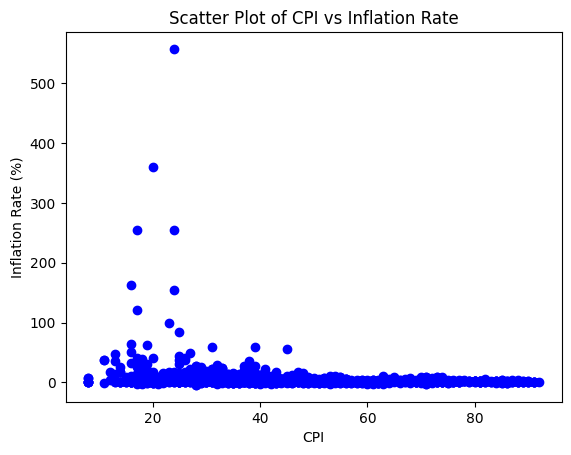

In [15]:
import warnings
warnings.filterwarnings('ignore')

#code for second stat
corruption_df = pd.read_csv("/content/sample_data/corruption_data.csv")
corruption_df_countries = corruption_df['region_name'].tolist()
for i in range(len(corruption_df_countries)):
  corruption_df['region_name'][i] = (corruption_df['region_name'][i]).lstrip()

inflation_df = df

# Standardizing the two DataFrames
# We must standarize the country names between the two DataFrames
# Standardized country names are:
#     1) In english
#     2) Have only the first character capitalized
standardized_country_names = {
    "AFGANISTAN": "Afghanistan",
    "ALBANIA": "Albania",
    "ARGELIA": "Algeria",
    "ANGOLA": "Angola",
    "ANTIGUA Y BARBUDA": "Antigua and Barbuda",
    "ARGENTINA": "Argentina",
    "ARMENIA": "Armenia",
    "AUSTRALIA": "Australia",
    "AUSTRIA": "Austria",
    "AZERBAIYAN": "Azerbaijan",
    "BAHAMAS": "Bahamas",
    "BAHREIN": "Bahrain",
    "BANGLADESH": "Bangladesh",
    "BARBADOS": "Barbados",
    "BELARUS": "Belarus",
    "BELGICA": "Belgium",
    "BELICE": "Belize",
    "BENIN": "Benin",
    "BHUTAN": "Bhutan",
    "BOLIVIA": "Bolivia",
    "BOSNIA Y HERZEGOVINA": "Bosnia and Herzegovina",
    "BOTSWANA": "Botswana",
    "BRASIL": "Brazil",
    "BRUNEI DARUSSALAM": "Brunei",
    "BULGARIA": "Bulgaria",
    "BURKINA FASO": "Burkina Faso",
    "BURUNDI": "Burundi",
    "CAMBOYA": "Cambodia",
    "CAMERUN": "Cameroon",
    "CANADA": "Canada",
    "CABO VERDE": "Cape Verde",
    "REPUBLICA CENTROAFRICANA": "Central African Republic",
    "CHAD": "Chad",
    "CHILE": "Chile",
    "CHINA": "China",
    "COLOMBIA": "Colombia",
    "COMORAS": "Comoros",
    "CONGO, REPUBLICA DEMOCRATICA DEL": "Democratic Republic of the Congo",
    "CONGO, REPUBLICA DEL": "Republic of the Congo",
    "COSTA RICA": "Costa Rica",
    "COTE D'IVOIRE": "Ivory Coast",
    "CROACIA": "Croatia",
    "CHIPRE": "Cyprus",
    "REPUBLICA CHECA": "Czech Republic",
    "DINAMARCA": "Denmark",
    "DJIBOUTI": "Djibouti",
    "DOMINICA": "Dominica",
    "REPUBLICA DOMINICANA": "Dominican Republic",
    "ECUADOR": "Ecuador",
    "EGIPTO, REPUBLICA ARABE DE": "Egypt",
    "EL SALVADOR": "El Salvador",
    "GUINEA ECUATORIAL": "Equatorial Guinea",
    "ERITREA": "Eritrea",
    "ESTONIA": "Estonia",
    "ETIOPIA": "Ethiopia",
    "FIJI": "Fiji",
    "FINLANDIA": "Finland",
    "FRANCIA": "France",
    "GABON": "Gabon",
    "GAMBIA": "Gambia, The",
    "GEORGIA": "Georgia",
    "ALEMANIA": "Germany",
    "GHANA": "Ghana",
    "GRECIA": "Greece",
    "GRANADA": "Grenada",
    "GUATEMALA": "Guatemala",
    "GUINEA": "Guinea",
    "GUINEA-BISSAU": "Guinea-Bissau",
    "GUYANA": "Guyana",
    "HAITI": "Haiti",
    "HONDURAS": "Honduras",
    "HONG KONG, REGION ADMINISTRATIVA ESPECIAL": "Hong Kong",
    "HUNGRIA": "Hungary",
    "ISLANDIA": "Iceland",
    "INDIA": "India",
    "INDONESIA": "Indonesia",
    "IRAN, REPUBLICA ISLAMICA DEL": "Iran",
    "IRAQ": "Iraq",
    "IRLANDA": "Ireland",
    "ISRAEL": "Israel",
    "ITALIA": "Italy",
    "JAMAICA": "Jamaica",
    "JAPON": "Japan",
    "JORDANIA": "Jordan",
    "KAZAJSTAN": "Kazakhstan",
    "KENYA": "Kenya",
    "KIRIBATI": "Kiribati",
    "COREA, REPUBLICA DE": "South Korea",
    "COREA, REPUBLICA POPULAR DEMOCRATICA DE": "North Korea",
    "KUWAIT": "Kuwait",
    "KIRGUISTAN": "Kyrgyz Republic",
    "REPUBLICA DEMOCRATICA POPULAR LAO": "Laos",
    "LETONIA": "Latvia",
    "LIBANO": "Lebanon",
    "LESOTHO": "Lesotho",
    "LIBERIA": "Liberia",
    "LIBIA": "Libya",
    "LITUANIA": "Lithuania",
    "LUXEMBURGO": "Luxembourg",
    "MACEDONIA DEL NORTE": "North Macedonia",
    "MADAGASCAR": "Madagascar",
    "MALAWI": "Malawi",
    "MALASIA": "Malaysia",
    "MALDIVAS": "Maldives",
    "MALI": "Mali",
    "MALTA": "Malta",
    "MAURITANIA": "Mauritania",
    "MAURICIO": "Mauritius",
    "MEXICO": "Mexico",
    "REPUBLICA DE MOLDOVA": "Moldova",
    "MONGOLIA": "Mongolia",
    "MARRUECOS": "Morocco",
    "MOZAMBIQUE": "Mozambique",
    "MYANMAR": "Myanmar",
    "NAMIBIA": "Namibia",
    "NEPAL": "Nepal",
    "PAISES BAJOS": "Netherlands",
    "NUEVA ZELANDIA": "New Zealand",
    "NICARAGUA": "Nicaragua",
    "NIGER": "Niger",
    "NIGERIA": "Nigeria",
    "NORUEGA": "Norway",
    "OMAN": "Oman",
    "PAKISTAN": "Pakistan",
    "PANAMA": "Panama",
    "PAPUA NUEVA GUINEA": "Papua New Guinea",
    "PARAGUAY": "Paraguay",
    "PERU": "Peru",
    "FILIPINAS": "Philippines",
    "POLONIA": "Poland",
    "PORTUGAL": "Portugal",
    "QATAR": "Qatar",
    "RUMANIA": "Romania",
    "FEDERACION DE RUSIA": "Russia",
    "RWANDA": "Rwanda",
    "SAMOA": "Samoa",
    "SANTO TOME Y PRINCIPE": "São Tomé and Príncipe",
    "ARABIA SAUDITA": "Saudi Arabia",
    "SENEGAL": "Senegal",
    "SERBIA": "Serbia",
    "SEYCHELLES": "Seychelles",
    "SIERRA LEONA": "Sierra Leone",
    "SINGAPUR": "Singapore",
    "REPUBLICA ESLOVACA": "Slovakia",
    "ESLOVENIA": "Slovenia",
    "ISLAS SALOMON": "Solomon Islands",
    "SUDAFRICA": "South Africa",
    "ESPANA": "Spain",
    "SRI LANKA": "Sri Lanka",
    "SAINT KITTS Y NEVIS": "Saint Kitts and Nevis",
    "SANTA LUCIA": "Saint Lucia",
    "SAN VICENTE Y LAS GRANADINAS": "Saint Vincent and the Grenadines",
    "SUDAN": "Sudan",
    "SURINAME": "Suriname",
    "SUECIA": "Sweden",
    "SUIZA": "Switzerland",
    "REPUBLICA ARABE SIRIA": "Syria",
    "TAYIKISTAN": "Tajikistan",
    "TANZANIA": "Tanzania",
    "TAILANDIA": "Thailand",
    "TIMOR-LESTE": "Timor-Leste",
    "TOGO": "Togo",
    "TONGA": "Tonga",
    "TRINIDAD Y TOBAGO": "Trinidad and Tobago",
    "TUNEZ": "Tunisia",
    "TURQUIA": "Turkey",
    "TURKMENISTAN": "Turkmenistan",
    "UGANDA": "Uganda",
    "UCRANIA": "Ukraine",
    "EMIRATOS ARABES UNIDOS": "United Arab Emirates",
    "REINO UNIDO": "United Kingdom",
    "ESTADOS UNIDOS": "United States",
    "URUGUAY": "Uruguay",
    "UZBEKISTAN": "Uzbekistan",
    "VANUATU": "Vanuatu",
    "VENEZUELA": "Venezuela",
    "VIET NAM": "Vietnam",
    "YEMEN, REP. DEL": "Yemen",
    "ZAMBIA": "Zambia",
    "ZIMBABWE": "Zimbabwe"
}

# Standardize the country names
inflation_df['country_name'] = inflation_df['country_name'].replace(standardized_country_names)
inflation_df = inflation_df[(inflation_df['year'] >= 2012) & (inflation_df['year'] <= 2021)]
display(inflation_df)
corruption_df = corruption_df.rename(columns={"region_name": "country_name"})
display(corruption_df)

#corruption_df_melted = corruption_df.melt(corruption_df, id_vars=['country_name'], value_vars=['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012'], var_name='year', value_name='CPI')
corruption_df_melted = corruption_df.melt(id_vars=['country_name'], var_name='year', value_name='CPI')
#corruption_df_melted = corruption_df_melted.sort_values(by='country_name')
corruption_df_final = corruption_df_melted.sort_values(by=['country_name', 'year']).reset_index(drop=True)
corruption_df_final['year'] = corruption_df_final['year'].astype(int)
display(corruption_df_final)

# Merging the two DataFrames
print(type(corruption_df_final['year'][0]))
inflation_and_CPI_df = pd.merge(inflation_df.drop(columns=['indicator_code']), corruption_df_final, on=['country_name', 'year'], how='left')
inflation_and_CPI_df = inflation_and_CPI_df.dropna()
display(inflation_and_CPI_df)

#plot
plt.scatter(inflation_and_CPI_df['CPI'], inflation_and_CPI_df['inflation_rate'], color='blue', marker='o')

plt.xlabel('CPI')
plt.ylabel('Inflation Rate (%)')
plt.title('Scatter Plot of CPI vs Inflation Rate')

plt.show()

Linear Regression Code Help: https://www.geeksforgeeks.org/linear-regression-in-python-using-statsmodels/ \\
Linear Regression Help: https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-linear-regression/

In [16]:
# Linear Regression
import statsmodels.api as sm
import seaborn as sns

# Linear Regression by individual country
country_to_coeff = {}
for country, group in inflation_and_CPI_df.groupby('country_name'):
  X = group['CPI']
  y = group['inflation_rate']
  X = sm.add_constant(X)
  model = sm.OLS(y, X)
  results = model.fit()
  p_values = results.pvalues
  print(f"P values for {country}: ")
  display(p_values)

# Linear Regression by subregion
region_to_coeff = {}
for region, group in inflation_and_CPI_df.groupby('sub_region'):
  X = group['CPI']
  y = group['inflation_rate']
  X = sm.add_constant(X)
  model = sm.OLS(y, X)
  results = model.fit()
  p_values = results.pvalues
  print(f"P values for {region}: ")
  display(p_values)

# Linear Regression for All Countries Together (global scale)
X = inflation_and_CPI_df['CPI']
y = inflation_and_CPI_df['inflation_rate']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

print("p-values")
p_values = results.pvalues
display(p_values)

P values for Afghanistan: 


,0
const,0.010266
CPI,0.042504


P values for Albania: 


,0
const,0.050995
CPI,0.344902


P values for Algeria: 


,0
const,0.011669
CPI,0.018467


P values for Angola: 


,0
const,0.514681
CPI,0.621869


P values for Argentina: 


,0
const,NaN
CPI,NaN


P values for Armenia: 


,0
const,0.635489
CPI,0.339674


P values for Australia: 


,0
const,0.463469
CPI,0.688601


P values for Austria: 


,0
const,0.096330
CPI,0.165892


P values for Azerbaijan: 


,0
const,0.110579
CPI,0.076306


P values for Bahamas: 


,0
const,0.698679
CPI,0.837820


P values for Bahrain: 


,0
const,0.462835
CPI,0.301497


P values for Bangladesh: 


,0
const,0.355895
CPI,0.879655


P values for Barbados: 


,0
const,0.654721
CPI,0.507221


P values for Belarus: 


,0
const,0.019732
CPI,0.048199


P values for Belgium: 


,0
const,0.083286
CPI,0.096715


P values for Benin: 


,0
const,0.824565
CPI,0.896418


P values for Bhutan: 


,0
const,0.031837
CPI,0.046245


P values for Bolivia: 


,0
const,0.002959
CPI,0.001296


P values for Bosnia and Herzegovina: 


,0
const,0.949497
CPI,0.926497


P values for Botswana: 


,0
const,0.874180
CPI,0.915421


P values for Brazil: 


,0
const,0.602652
CPI,0.287038


P values for Brunei: 


,0
const,0.902036
CPI,0.882379


P values for Bulgaria: 


,0
const,0.706140
CPI,0.662004


P values for Burkina Faso: 


,0
const,0.749869
CPI,0.699623


P values for Burundi: 


,0
const,0.197924
CPI,0.134944


P values for Cambodia: 


,0
const,0.851850
CPI,0.507019


P values for Cameroon: 


,0
const,0.532833
CPI,0.387951


P values for Canada: 


,0
const,0.084914
CPI,0.130935


P values for Cape Verde: 


,0
const,0.523081
CPI,0.488459


P values for Central African Republic: 


,0
const,0.477880
CPI,0.639994


P values for Chad: 


,0
const,0.987331
CPI,0.939799


P values for Chile: 


,0
const,0.819134
CPI,0.585735


P values for China: 


,0
const,0.288938
CPI,0.621266


P values for Colombia: 


,0
const,0.823697
CPI,0.978468


P values for Comoros: 


,0
const,0.826287
CPI,0.806674


P values for Costa Rica: 


,0
const,0.005189
CPI,0.007021


P values for Croatia: 


,0
const,0.043611
CPI,0.048874


P values for Cyprus: 


,0
const,0.849611
CPI,0.859698


P values for Czech Republic: 


,0
const,0.828982
CPI,0.944232


P values for Democratic Republic of the Congo: 


,0
const,0.567054
CPI,0.495858


P values for Denmark: 


,0
const,0.591718
CPI,0.642018


P values for Djibouti: 


,0
const,0.988777
CPI,0.761321


P values for Dominica: 


,0
const,0.663010
CPI,0.691802


P values for Dominican Republic: 


,0
const,0.314564
CPI,0.453315


P values for Ecuador: 


,0
const,0.049737
CPI,0.072239


P values for Egypt: 


,0
const,0.530194
CPI,0.690233


P values for El Salvador: 


,0
const,0.350959
CPI,0.415854


P values for Equatorial Guinea: 


,0
const,0.648811
CPI,0.458705


P values for Eritrea: 


,0
const,NaN
CPI,NaN


P values for Estonia: 


,0
const,0.704583
CPI,0.801072


P values for Ethiopia: 


,0
const,0.081125
CPI,0.038309


P values for Finland: 


,0
const,0.572894
CPI,0.520265


P values for France: 


,0
const,0.019221
CPI,0.016694


P values for Gabon: 


,0
const,0.875185
CPI,0.679420


P values for Georgia: 


,0
const,0.220526
CPI,0.165119


P values for Germany: 


,0
const,0.420860
CPI,0.451269


P values for Ghana: 


,0
const,0.215514
CPI,0.072855


P values for Greece: 


,0
const,0.815038
CPI,0.791840


P values for Grenada: 


,0
const,0.504457
CPI,0.487210


P values for Guatemala: 


,0
const,0.139791
CPI,0.940777


P values for Guinea: 


,0
const,0.044461
CPI,0.176964


P values for Guinea-Bissau: 


,0
const,0.916177
CPI,0.670358


P values for Guyana: 


,0
const,0.621726
CPI,0.338234


P values for Haiti: 


,0
const,0.619166
CPI,0.875681


P values for Honduras: 


,0
const,0.132235
CPI,0.609002


P values for Hong Kong: 


,0
const,0.047774
CPI,0.055743


P values for Hungary: 


,0
const,0.246290
CPI,0.389526


P values for Iceland: 


,0
const,0.921459
CPI,0.772822


P values for India: 


,0
const,0.000332
CPI,0.000771


P values for Indonesia: 


,0
const,0.013374
CPI,0.034517


P values for Iran: 


,0
const,0.001156
CPI,0.002522


P values for Iraq: 


,0
const,0.606783
CPI,0.417969


P values for Ireland: 


,0
const,0.394211
CPI,0.418160


P values for Israel: 


,0
const,0.128950
CPI,0.137867


P values for Italy: 


,0
const,0.619764
CPI,0.812786


P values for Ivory Coast: 


,0
const,0.615946
CPI,0.782603


P values for Jamaica: 


,0
const,0.055375
CPI,0.126315


P values for Japan: 


,0
const,0.023651
CPI,0.022272


P values for Jordan: 


,0
const,0.066555
CPI,0.081451


P values for Kazakhstan: 


,0
const,0.299747
CPI,0.914049


P values for Kenya: 


,0
const,0.140866
CPI,0.514958


P values for Kuwait: 


,0
const,0.203689
CPI,0.087000


P values for Laos: 


,0
const,0.190462
CPI,0.415271


P values for Latvia: 


,0
const,0.59007
CPI,0.48615


P values for Lebanon: 


,0
const,0.000678
CPI,0.000839


P values for Lesotho: 


,0
const,0.057135
CPI,0.449336


P values for Liberia: 


,0
const,0.009366
CPI,0.037413


P values for Libya: 


,0
const,0.159953
CPI,0.245389


P values for Lithuania: 


,0
const,0.734629
CPI,0.816605


P values for Luxembourg: 


,0
const,0.375407
CPI,0.399708


P values for Madagascar: 


,0
const,0.102552
CPI,0.549458


P values for Malawi: 


,0
const,0.38806
CPI,0.16730


P values for Malaysia: 


,0
const,0.268363
CPI,0.331215


P values for Maldives: 


,0
const,0.561553
CPI,0.687795


P values for Mali: 


,0
const,0.369019
CPI,0.324308


P values for Malta: 


,0
const,0.267697
CPI,0.218635


P values for Mauritania: 


,0
const,0.058923
CPI,0.021553


P values for Mauritius: 


,0
const,0.949072
CPI,0.787672


P values for Mexico: 


,0
const,0.059100
CPI,0.248615


P values for Moldova: 


,0
const,0.155685
CPI,0.333055


P values for Mongolia: 


,0
const,0.940965
CPI,0.772012


P values for Morocco: 


,0
const,0.213709
CPI,0.342259


P values for Mozambique: 


,0
const,0.234296
CPI,0.382612


P values for Myanmar: 


,0
const,0.629719
CPI,0.772302


P values for Namibia: 


,0
const,0.179863
CPI,0.299592


P values for Nepal: 


,0
const,0.007011
CPI,0.026714


P values for Netherlands: 


,0
const,0.229011
CPI,0.266700


P values for New Zealand: 


,0
const,0.077538
CPI,0.089795


P values for Nicaragua: 


,0
const,0.987099
CPI,0.194006


P values for Niger: 


,0
const,0.474468
CPI,0.516730


P values for Nigeria: 


,0
const,0.622918
CPI,0.992867


P values for North Korea: 


,0
const,NaN
CPI,NaN


P values for North Macedonia: 


,0
const,0.937403
CPI,0.732220


P values for Norway: 


,0
const,0.955126
CPI,0.980772


P values for Oman: 


,0
const,0.252298
CPI,0.358582


P values for Pakistan: 


,0
const,0.111039
CPI,0.236458


P values for Panama: 


,0
const,0.762709
CPI,0.712357


P values for Papua New Guinea: 


,0
const,0.099234
CPI,0.623355


P values for Paraguay: 


,0
const,0.544713
CPI,0.830958


P values for Peru: 


,0
const,0.891939
CPI,0.846704


P values for Philippines: 


,0
const,0.814336
CPI,0.632543


P values for Poland: 


,0
const,0.000045
CPI,0.000058


P values for Portugal: 


,0
const,0.316067
CPI,0.300717


P values for Qatar: 


,0
const,0.164355
CPI,0.135960


P values for Republic of the Congo: 


,0
const,0.242838
CPI,0.104758


P values for Romania: 


,0
const,0.177454
CPI,0.217705


P values for Russia: 


,0
const,0.90504
CPI,0.98232


P values for Rwanda: 


,0
const,0.887661
CPI,0.796096


P values for Saint Lucia: 


,0
const,0.351043
CPI,0.299833


P values for Saint Vincent and the Grenadines: 


,0
const,0.587854
CPI,0.636596


P values for Saudi Arabia: 


,0
const,0.305214
CPI,0.390790


P values for Senegal: 


,0
const,0.906055
CPI,0.954232


P values for Serbia: 


,0
const,0.873608
CPI,0.765349


P values for Seychelles: 


,0
const,0.914045
CPI,0.829024


P values for Sierra Leone: 


,0
const,0.739017
CPI,0.504613


P values for Singapore: 


,0
const,0.009794
CPI,0.009331


P values for Slovakia: 


,0
const,0.258291
CPI,0.303944


P values for Slovenia: 


,0
const,0.642531
CPI,0.694873


P values for Solomon Islands: 


,0
const,0.646514
CPI,0.588181


P values for South Africa: 


,0
const,0.724321
CPI,0.925413


P values for South Korea: 


,0
const,0.82216
CPI,0.96580


P values for Spain: 


,0
const,0.567495
CPI,0.508614


P values for Sri Lanka: 


,0
const,0.603777
CPI,0.477037


P values for Sudan: 


,0
const,0.028876
CPI,0.009918


P values for Suriname: 


,0
const,0.567923
CPI,0.440855


P values for Sweden: 


,0
const,0.010700
CPI,0.012448


P values for Switzerland: 


,0
const,0.047309
CPI,0.047047


P values for Syria: 


,0
const,0.765557
CPI,0.252479


P values for São Tomé and Príncipe: 


,0
const,0.52215
CPI,0.92197


P values for Tajikistan: 


,0
const,0.534977
CPI,0.661834


P values for Tanzania: 


,0
const,0.300265
CPI,0.500159


P values for Thailand: 


,0
const,0.833826
CPI,0.884164


P values for Timor-Leste: 


,0
const,0.361652
CPI,0.500296


P values for Togo: 


,0
const,0.702183
CPI,0.795595


P values for Trinidad and Tobago: 


,0
const,0.193625
CPI,0.251664


P values for Tunisia: 


,0
const,0.145739
CPI,0.040795


P values for Turkey: 


,0
const,0.008804
CPI,0.039191


P values for Turkmenistan: 


,0
const,NaN
CPI,NaN


P values for Uganda: 


,0
const,0.349136
CPI,0.254295


P values for Ukraine: 


,0
const,0.591755
CPI,0.758714


P values for United Arab Emirates: 


,0
const,0.559404
CPI,0.582487


P values for United Kingdom: 


,0
const,0.276534
CPI,0.369828


P values for United States: 


,0
const,0.060284
CPI,0.088301


P values for Uruguay: 


,0
const,0.632845
CPI,0.365215


P values for Uzbekistan: 


,0
const,0.217640
CPI,0.423617


P values for Vanuatu: 


,0
const,0.064529
CPI,0.079709


P values for Venezuela: 


,0
const,0.929093
CPI,0.785537


P values for Vietnam: 


,0
const,0.101382
CPI,0.191352


P values for Yemen: 


,0
const,0.015714
CPI,0.007466


P values for Zambia: 


,0
const,0.086388
CPI,0.153972


P values for Zimbabwe: 


,0
const,0.00907
CPI,0.00733


P values for AUSTRALIA AND NEW ZEALAND: 


,0
const,0.051612
CPI,0.170572


P values for CENTRAL ASIA: 


,0
const,0.968819
CPI,0.117315


P values for EASTERN ASIA: 


,0
const,0.008475
CPI,0.778542


P values for EASTERN EUROPE: 


,0
const,7.692066e-09
CPI,4.885259e-06


P values for LATIN AMERICA AND THE CARIBBEAN: 


,0
const,0.000003
CPI,0.001952


P values for MELANESIA: 


,0
const,8.131814e-07
CPI,2.639722e-04


P values for NORTHERN AFRICA: 


,0
const,0.000915
CPI,0.010755


P values for NORTHERN AMERICA: 


,0
const,0.025705
CPI,0.081054


P values for NORTHERN EUROPE: 


,0
const,0.005803
CPI,0.286991


P values for SOUTH-EASTERN ASIA: 


,0
const,5.840140e-14
CPI,3.509341e-05


P values for SOUTHERN ASIA: 


,0
const,0.000029
CPI,0.237392


P values for SOUTHERN EUROPE: 


,0
const,0.003685
CPI,0.157717


P values for SUB-SAHARAN AFRICA: 


,0
const,0.004026
CPI,0.200576


P values for WESTERN ASIA: 


,0
const,0.000003
CPI,0.000844


P values for WESTERN EUROPE: 


,0
const,0.002439
CPI,0.018574


p-values


,0
const,3.190133e-24
CPI,1.672439e-10


Second conclusion: As a whole, the p-value is less than 0.05, so the null hypothesis is rejected and there is statistical signifcance between CPI and inflation rate. However, the test on the countries and regions show that in some countries or regions, we fail to reject the null hypothesis, meaning in those countries or regions, there is no statistical significance between CPI and inflation rate.

#### **(3) The third statistical method: Pearson Correlation**

##### Introduction and Motivation

Inflation Rate and GDP are two important measures of a country's economy. We will examine if there is a correlation between a country's Inflation Rate and GDP from 1999 to 2022.

In [17]:
data = pd.read_csv("/content/sample_data/GDP by Country 1999-2022.csv")
GDP_data = pd.DataFrame(data)
GDP_data

,Country,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Afghanistan, Rep. of.",0,0,0,4.084,4.585,5.971,7.309,8.399,9.892,...,21.555,24.304,0,0,0,0,0,0,0,0
1,Albania,3.444,3.695,4.096,4.456,5.6,7.452,8.376,9.133,10.163,...,14.91,16.053,11.591,12.204,13.214,14.341,15.553,16.996,16.77,18.012
2,Algeria,48.845,54.749,55.181,57.053,68.013,85.016,102.38,114.322,116.158,...,190.432,203.449,175.077,181.71,192.256,202.179,210.906,219.16,163.812,168.195
3,Angola,6.153,9.135,8.936,11.386,13.956,19.8,30.632,43.759,55.37,...,136.415,151.089,102.011,98.815,105.369,112.533,119.403,127.15,70.339,74.953
4,Antigua and Barbuda,0.652,0.678,0.71,0.718,0.754,0.818,0.875,0.962,1.026,...,1.404,1.494,1.285,1.328,1.386,1.458,1.536,1.617,1.405,1.534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Venezuela,97.977,117.153,122.872,92.889,83.442,112.8,143.443,181.608,219.372,...,403.123,409.562,131.855,133.534,144.227,155.096,170.41,184.364,44.893,43.546
176,Vietnam,28.684,31.196,32.504,35.148,39.63,45.548,53.053,60.995,68.298,...,135.729,148.914,198.805,214.75,229.845,247.415,265.987,287.257,368.002,415.493
177,"Yemen, Republic of",7.53,9.561,9.533,9.985,11.869,13.565,15.193,18.7,21.657,...,40.003,42.687,0,0,0,0,0,0,0,0
178,Zambia,3.132,3.238,3.64,3.775,4.326,5.44,7.271,10.942,10.104,...,21.829,23.613,24.466,25.158,27.17,29.911,32.957,36.316,21.699,23.967


##### Cleaning Data

The country names between the two DataFrames are inconsistent. We must standardize the country names according to the following rules:

*   Names must be in English
*   Only the first letter of the name should be capitalized



In [18]:
standardized_country_names = {
    "AFGANISTAN": "Afghanistan, Rep. of.",
    "ALBANIA": "Albania",
    "ARGELIA": "Algeria",
    "ANGOLA": "Angola",
    "ANTIGUA Y BARBUDA": "Antigua and Barbuda",
    "ARGENTINA": "Argentina",
    "ARMENIA": "Armenia",
    "AUSTRALIA": "Australia",
    "AUSTRIA": "Austria",
    "AZERBAIYAN": "Azerbaijan",
    "BAHAMAS": "Bahamas, The",
    "BAHREIN": "Bahrain",
    "BANGLADESH": "Bangladesh",
    "BARBADOS": "Barbados",
    "BELARUS": "Belarus",
    "BELGICA": "Belgium",
    "BELICE": "Belize",
    "BENIN": "Benin",
    "BHUTAN": "Bhutan",
    "BOLIVIA": "Bolivia",
    "BOSNIA Y HERZEGOVINA": "Bosnia and Herzegovina",
    "BOTSWANA": "Botswana",
    "BRASIL": "Brazil",
    "BRUNEI DARUSSALAM": "Brunei Darussalam",
    "BULGARIA": "Bulgaria",
    "BURKINA FASO": "Burkina Faso",
    "BURUNDI": "Burundi",
    "CAMBOYA": "Cambodia",
    "CAMERUN": "Cameroon",
    "CANADA": "Canada",
    "CABO VERDE": "Cape Verde",
    "REPUBLICA CENTROAFRICANA": "Central African Republic",
    "CHAD": "Chad",
    "CHILE": "Chile",
    "CHINA": "China",
    "COLOMBIA": "Colombia",
    "COMORAS": "Comoros",
    "CONGO, REPUBLICA DEMOCRATICA DEL": "Congo, Democratic Republic of",
    "CONGO, REPUBLICA DEL": "Congo, Republic of",
    "COSTA RICA": "Costa Rica",
    "COTE D'IVOIRE": "Côte d'Ivoire",
    "CROACIA": "Croatia",
    "CHIPRE": "Cyprus",
    "REPUBLICA CHECA": "Czech Republic",
    "DINAMARCA": "Denmark",
    "DJIBOUTI": "Djibouti",
    "DOMINICA": "Dominica",
    "REPUBLICA DOMINICANA": "Dominican Republic",
    "ECUADOR": "Ecuador",
    "EGIPTO, REPUBLICA ARABE DE": "Egypt",
    "EL SALVADOR": "El Salvador",
    "GUINEA ECUATORIAL": "Equatorial Guinea",
    "ERITREA": "Eritrea",
    "ESTONIA": "Estonia",
    "ETIOPIA": "Ethiopia",
    "FIJI": "Fiji",
    "FINLANDIA": "Finland",
    "FRANCIA": "France",
    "GABON": "Gabon",
    "GAMBIA": "Gambia, The",
    "GEORGIA": "Georgia",
    "ALEMANIA": "Germany",
    "GHANA": "Ghana",
    "GRECIA": "Greece",
    "GRANADA": "Grenada",
    "GUATEMALA": "Guatemala",
    "GUINEA": "Guinea",
    "GUINEA-BISSAU": "Guinea-Bissau",
    "GUYANA": "Guyana",
    "HAITI": "Haiti",
    "HONDURAS": "Honduras",
    "HONG KONG, REGION ADMINISTRATIVA ESPECIAL": "Hong Kong SAR",
    "HUNGRIA": "Hungary",
    "ISLANDIA": "Iceland",
    "INDIA": "India",
    "INDONESIA": "Indonesia",
    "IRAN, REPUBLICA ISLAMICA DEL": "Iran, Islamic Republic of",
    "IRLANDA": "Ireland",
    "ISRAEL": "Israel",
    "ITALIA": "Italy",
    "JAMAICA": "Jamaica",
    "JAPON": "Japan",
    "JORDANIA": "Jordan",
    "KAZAJSTAN": "Kazakhstan",
    "KENYA": "Kenya",
    "KIRIBATI": "Kiribati",
    "COREA, REPUBLICA DE": "Korea",
    "KUWAIT": "Kuwait",
    "KIRGUISTAN": "Kyrgyz Republic",
    "REPUBLICA DEMOCRATICA POPULAR LAO": "Lao People's Democratic Republic",
    "LETONIA": "Latvia",
    "LIBANO": "Lebanon",
    "LESOTHO": "Lesotho",
    "LIBERIA": "Liberia",
    "LIBIA": "Libya",
    "LITUANIA": "Lithuania",
    "LUXEMBURGO": "Luxembourg",
    "MACEDONIA DEL NORTE": "Macedonia, Former Yugoslav Republic of",
    "MADAGASCAR": "Madagascar",
    "MALAWI": "Malawi",
    "MALASIA": "Malaysia",
    "MALDIVAS": "Maldives",
    "MALI": "Mali",
    "MALTA": "Malta",
    "MAURITANIA": "Mauritania",
    "MAURICIO": "Mauritius",
    "MEXICO": "Mexico",
    "REPUBLICA DE MOLDOVA": "Moldova",
    "MONGOLIA": "Mongolia",
    "MARRUECOS": "Morocco",
    "MOZAMBIQUE": "Mozambique",
    "MYANMAR": "Myanmar",
    "NAMIBIA": "Namibia",
    "NEPAL": "Nepal",
    "PAISES BAJOS": "Netherlands",
    "NUEVA ZELANDIA": "New Zealand",
    "NICARAGUA": "Nicaragua",
    "NIGER": "Niger",
    "NIGERIA": "Nigeria",
    "NORUEGA": "Norway",
    "OMAN": "Oman",
    "PAKISTAN": "Pakistan",
    "PANAMA": "Panama",
    "PAPUA NUEVA GUINEA": "Papua New Guinea",
    "PARAGUAY": "Paraguay",
    "PERU": "Peru",
    "FILIPINAS": "Philippines",
    "POLONIA": "Poland",
    "PORTUGAL": "Portugal",
    "QATAR": "Qatar",
    "RUMANIA": "Romania",
    "FEDERACION DE RUSIA": "Russia",
    "RWANDA": "Rwanda",
    "SAMOA": "Samoa",
    "SANTO TOME Y PRINCIPE": "São Tomé and Príncipe",
    "ARABIA SAUDITA": "Saudi Arabia",
    "SENEGAL": "Senegal",
    "SERBIA": "Serbia",
    "SEYCHELLES": "Seychelles",
    "SIERRA LEONA": "Sierra Leone",
    "SINGAPUR": "Singapore",
    "REPUBLICA ESLOVACA": "Slovak Republic",
    "ESLOVENIA": "Slovenia",
    "ISLAS SALOMON": "Solomon Islands",
    "SUDAFRICA": "South Africa",
    "ESPANA": "Spain",
    "SRI LANKA": "Sri Lanka",
    "SAINT KITTS Y NEVIS": "St. Kitts and Nevis",
    "SANTA LUCIA": "St. Lucia",
    "SAN VICENTE Y LAS GRANADINAS": "St. Vincent and the Grenadines",
    "SUDAN": "Sudan",
    "SURINAME": "Suriname",
    "SUECIA": "Sweden",
    "SUIZA": "Switzerland",
    "REPUBLICA ARABE SIRIA": "Syrian Arab Republic",
    "TAYIKISTAN": "Tajikistan",
    "TANZANIA": "Tanzania",
    "TAILANDIA": "Thailand",
    "TIMOR-LESTE": "Timor-Leste, Dem. Rep. of",
    "TOGO": "Togo",
    "TONGA": "Tonga",
    "TRINIDAD Y TOBAGO": "Trinidad and Tobago",
    "TUNEZ": "Tunisia",
    "TURQUIA": "Turkey",
    "TURKMENISTAN": "Turkmenistan",
    "UGANDA": "Uganda",
    "UCRANIA": "Ukraine",
    "EMIRATOS ARABES UNIDOS": "United Arab Emirates",
    "REINO UNIDO": "United Kingdom",
    "ESTADOS UNIDOS": "United States",
    "URUGUAY": "Uruguay",
    "UZBEKISTAN": "Uzbekistan",
    "VANUATU": "Vanuatu",
    "VENEZUELA": "Venezuela",
    "VIET NAM": "Vietnam",
    "YEMEN, REP. DEL": "Yemen, Republic of",
    "ZAMBIA": "Zambia",
    "ZIMBABWE": "Zimbabwe"
}

df['country_name'] = df['country_name'].replace(standardized_country_names)
GDP_data = GDP_data.rename(columns={"Country": "country_name"})

Next, we have to ensure consistent data formatting for across both datasets

In [19]:
# Converting the GDP data to the same format as the Inflation data
df_melted = GDP_data.melt(id_vars=['country_name'], var_name='year', value_name='GDP')
# Sorting the GDP data by Country and Year
GDP_final = df_melted.sort_values(by=['country_name', 'year']).reset_index(drop=True)

#Cleaning the GDP data
GDP_final['year'] = GDP_final['year'].astype(int)
GDP_final['GDP'] = GDP_final['GDP'].str.replace(',','').astype(float)

##### Merging the Datasets

Now we are ready to perform an inner merge on the datasets and visualize the relationship between inflation rate and GDP.

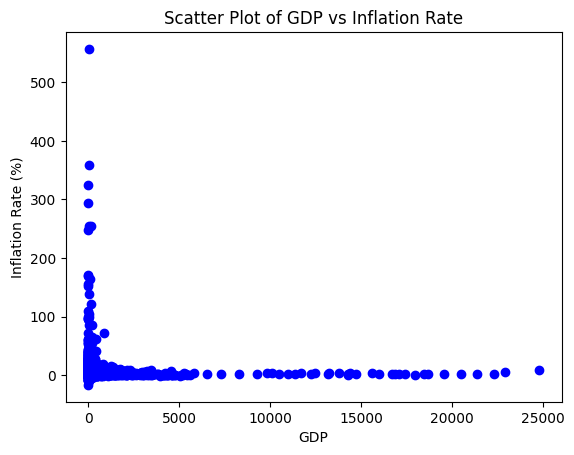

In [20]:
df_merged = pd.merge(df.drop(columns=['indicator_code']), GDP_final, on=['country_name', 'year'], how='inner')
df_merged

plt.scatter(df_merged['GDP'], df_merged['inflation_rate'], color='blue', marker='o')

plt.xlabel('GDP')
plt.ylabel('Inflation Rate (%)')
plt.title('Scatter Plot of GDP vs Inflation Rate')

plt.show()

##### Conducting Pearson Correlation Tests

Pearson Correlation Help: https://www.geeksforgeeks.org/python-pearson-correlation-test-between-two-variables/ \\
Pearson Applications: https://www.sciencedirect.com/topics/computer-science/pearson-correlation

In [21]:
# Conducting the Pearson Correlation by country
country_to_coeff = {}
for country, group in df_merged.groupby('country_name'):
  if group['inflation_rate'].nunique() > 1 and group['GDP'].nunique() > 1:
    corr, p_value = pearsonr(group['inflation_rate'], group['GDP'])
    country_to_coeff[country] = corr
  #print(f"The Pearson Correlation Coefficient for {country} is {corr}")

# Conducting the Pearson Correlation by subregion
region_to_coeff = {}
for region, group in df_merged.groupby('sub_region'):
  if group['inflation_rate'].nunique() > 1 and group['GDP'].nunique() > 1:
    corr, p_value = pearsonr(group['inflation_rate'], group['GDP'])
    region_to_coeff[region] = corr
  #print(f"The Pearson Correlation Coefficient for {region} is {corr}")

**Note: To see data for a specific country/region, uncomment the print statements**

##### Conclusion

In [22]:
avg_country = sum(country_to_coeff.values())/len(country_to_coeff)
print(f"The average correlation coefficient between a country's inflation rate and GDP is {avg_country}")
print("This suggests that there is a slight negative correlation between a country's inflation rate and its GDP\n")

avg_region = sum(region_to_coeff.values()) /len(region_to_coeff)
print(f"The average correlation coefficient between a region's inflation rate and GDP is {avg_region}")
print("This suggests that there is a slight negative correlation between a region's inflation rate and its GDP\n")

The average correlation coefficient between a country's inflation rate and GDP is -0.07546077588564419
This suggests that there is a slight negative correlation between a country's inflation rate and its GDP

The average correlation coefficient between a region's inflation rate and GDP is -0.04493951315434883
This suggests that there is a slight negative correlation between a region's inflation rate and its GDP



Third Conclusion: We can see that, on average, a country's inflation rate and GDP have a small negative correlation. This is interesting because despite both data being closely related to a country's economy, the data have little correlation to each other.

## **5. Primary Analysis: ML 1**

**We will use k-means clustering to look at which countries and subregions have similar inflation trends. The reasoning is that k-means can group similar features into clusters that can help us determine where new inflations may be located.**

K-means Help: https://www.geeksforgeeks.org/k-means-clustering-introduction/ \\
https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

#### K-means Model Countries

In [23]:
# Importing necessary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

First, we will do the K-means clustering to look at which countries have similar inflation trends.

In [24]:
# Modifying the dataset to make it compatible with K-Means Clustering
inflation_df_wide = df.pivot(index = 'country_name', columns='year', values='inflation_rate')
display(inflation_df_wide)

year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
country_name,,,,,,,,,,,,,,,,,,,,,
ANDORRA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ARUBA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,0.000000,0.000000,0.000000,0.000000
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,0.000000,0.000000,0.000000,0.000000
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.625865,1.896174,1.275432,1.986661,2.028060,1.411091,1.620887,2.041472,6.725203,4.759764
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.916927,4.784447,6.397695,5.591116,4.269990,1.951768,2.415131,7.226063,9.265516,9.322174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,62.168650,121.738085,254.948535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Vietnam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.084554,0.631201,2.668248,3.520257,3.539628,2.795824,3.220934,1.834716,3.156507,3.252893
Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.104726,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Elbow Method Help: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

Text(0, 0.5, 'Inertia')

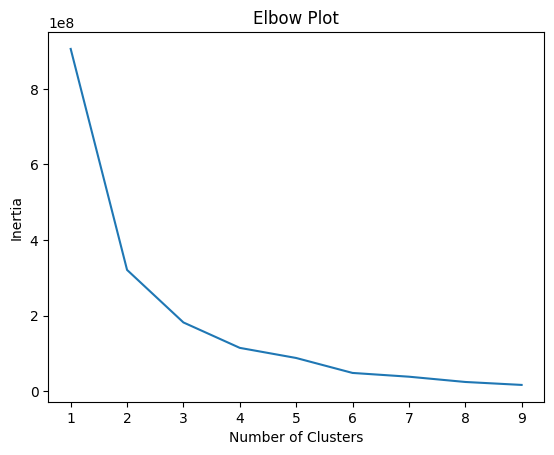

In [25]:
# Elbow Method
distortions = []
inertias = []
K = range(1, 10)
seed = 42

for k in K:
  kmeans = KMeans(n_clusters=k, random_state = seed)
  kmeans.fit(inflation_df_wide)
  inertias.append(kmeans.inertia_)
  distortions.append(kmeans.inertia_ / len(inflation_df_wide))

plt.plot(K, inertias)
plt.title("Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

We select K=4 to be our number of clusters.


In [26]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
inflation_df_scaled = scaler.fit_transform(inflation_df_wide)

In [27]:
# Apply PCA to help scale down data while retaining a specific amount of variance from the original data
def apply_pca(scaled_data, n_components=.95):
    pca = PCA(n_components = n_components)
    data_pca = pca.fit_transform(scaled_data)
    return pca, data_pca

pca, inflation_df_pca = apply_pca(inflation_df_scaled)

In [28]:
# Apply K-means clustering and return cluster labels
def apply_kmeans(X, n_clusters, random_state=seed):
    kmeans = KMeans(n_clusters = n_clusters, random_state = random_state)
    labels = kmeans.fit_predict(X)
    return labels

# Apply K-means to both PCA results
n_clusters = 4
pca_labels = apply_kmeans(inflation_df_pca, n_clusters = n_clusters)


## **6. Visualization: ML 1**

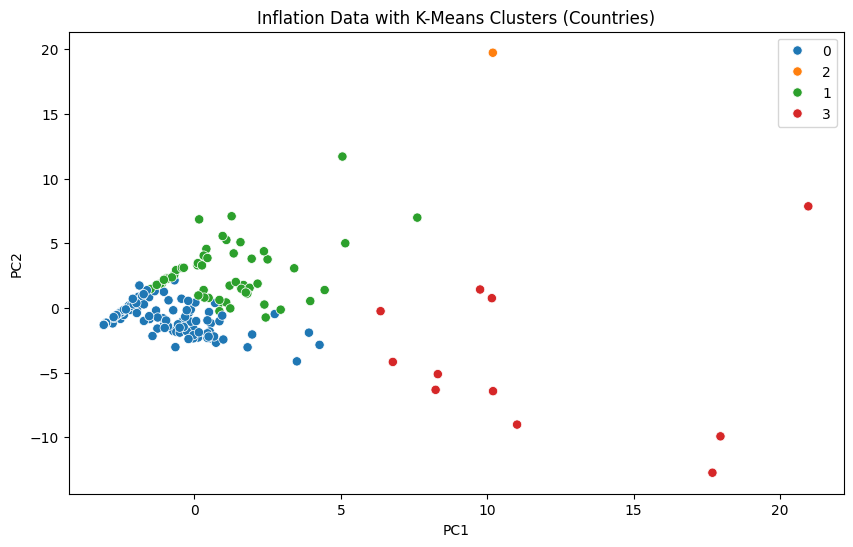

In [29]:
import seaborn as sns

kmeans = KMeans(n_clusters=4, random_state=seed)
labels = kmeans.fit_predict(inflation_df_pca)

plt.figure(figsize=(10,6))
plt.title('Inflation Data with K-Means Clusters (Countries)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Clusters')

sns.scatterplot(x=inflation_df_pca[:, 0],y=inflation_df_pca[:, 1], hue=labels.astype(str),s=45,legend="full")

plt.show()

Printing which cluster each country belongs to

In [30]:
for country, label in zip(inflation_df_wide.index, labels):
  print(f"{country}: {label}")

ANDORRA: 0
ARUBA: 0
Afghanistan: 0
Albania: 0
Algeria: 0
Angola: 2
Antigua and Barbuda: 0
Argentina: 0
Armenia: 0
Australia: 0
Austria: 0
Azerbaijan: 1
BERMUDAS: 0
Bahamas: 0
Bahrain: 0
Bangladesh: 1
Barbados: 0
Belarus: 1
Belgium: 0
Belize: 0
Benin: 0
Bhutan: 0
Bolivia: 3
Bosnia and Herzegovina: 0
Botswana: 1
Brazil: 3
Brunei: 0
Bulgaria: 0
Burkina Faso: 0
Burundi: 1
CUBA: 0
CURACAO: 0
Cambodia: 0
Cameroon: 0
Canada: 0
Cape Verde: 0
Central African Republic: 0
Chad: 0
Chile: 3
China: 0
Colombia: 0
Comoros: 0
Costa Rica: 1
Croatia: 0
Cyprus: 0
Czech Republic: 0
Democratic Republic of the Congo: 3
Denmark: 0
Djibouti: 0
Dominica: 0
Dominican Republic: 1
ESWATINI: 1
Ecuador: 0
Egypt: 1
El Salvador: 0
Equatorial Guinea: 0
Eritrea: 0
Estonia: 0
Ethiopia: 1
Fiji: 0
Finland: 0
France: 0
GIBRALTAR: 0
GROENLANDIA: 0
GUAM: 0
Gabon: 0
Gambia, The: 0
Georgia: 0
Germany: 0
Ghana: 3
Greece: 0
Grenada: 0
Guatemala: 0
Guinea: 1
Guinea-Bissau: 0
Guyana: 0
Haiti: 1
Honduras: 1
Hong Kong: 0
Hungary: 0
I

## **5. Primary Analysis: ML 2**

#### K-means Model Subregions

Now, let's do the K-means clustering to investigate inflation trends between different subregions.

In [31]:
# Modifying inflation data
subregions_inflation = pd.pivot_table(df, index='sub_region', columns='year', values='inflation_rate', aggfunc = 'mean')
display(subregions_inflation)

year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
sub_region,,,,,,,,,,,,,,,,,,,,,
AUSTRALIA AND NEW ZEALAND,2.213371,2.042643,1.180683,1.304762,3.170574,3.401531,3.024447,4.767590,3.416467,4.101965,...,1.857715,0.900536,0.961616,1.899718,1.754849,1.615200,1.280734,3.402516,6.883161,5.665089
CENTRAL ASIA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.954244,5.529609,5.777080,4.898743,5.046101,4.198584,5.182261,6.159150,8.079483,5.095653
EASTERN ASIA,1.648582,1.937731,1.921964,3.914079,4.751889,2.886312,2.328888,2.124613,2.301608,2.519912,...,4.097358,2.317961,1.193709,1.577871,2.396367,2.383889,1.112875,1.742003,3.947878,2.860143
EASTERN EUROPE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.284781,8.579458,3.670110,4.231100,3.851427,4.080311,3.153123,5.612981,15.016326,10.095375
LATIN AMERICA AND THE CARIBBEAN,1.828245,1.899346,1.319378,2.148965,2.793142,2.458416,3.380188,3.828555,5.090128,2.370865,...,4.041407,4.525496,9.160678,2.584499,2.076780,2.131594,2.369757,4.129228,6.623902,5.257751
MELANESIA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.377008,1.970030,2.493965,2.468567,2.849681,2.019830,2.113866,1.373458,4.394173,2.066547
MICRONESIA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.992288,0.174706,-0.023209,0.336538,0.596019,0.054022,0.475146,1.122483,3.301052,3.154581
NORTHERN AFRICA,0.641561,1.869540,0.626087,1.855765,1.938894,4.550133,3.663040,3.043881,-1.813657,4.792092,...,9.565765,8.077013,11.513357,16.552747,17.374279,11.159984,29.750834,63.584965,30.240574,10.166710
NORTHERN AMERICA,0.704168,0.522373,0.565086,0.716955,0.797764,0.979457,1.707684,1.588184,2.081774,2.505986,...,0.882215,0.310967,0.672586,0.931749,1.177702,0.940370,0.487646,2.023263,3.701400,1.998835


Text(0, 0.5, 'Inertia')

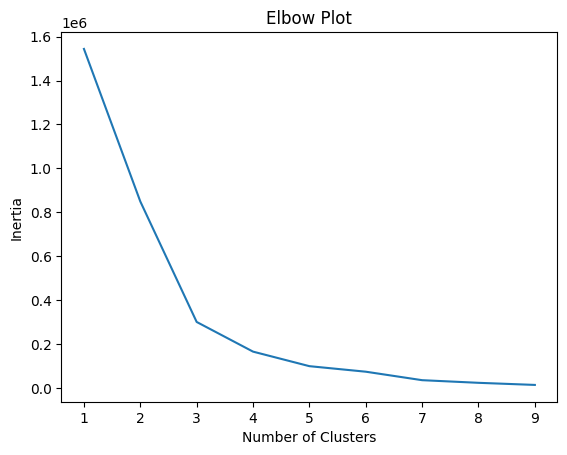

In [32]:
# Elbow Method
distortions = []
inertias = []
K = range(1, 10)
seed = 42

for k in K:
  kmeans = KMeans(n_clusters=k, random_state = seed)
  kmeans.fit(subregions_inflation)
  inertias.append(kmeans.inertia_)
  distortions.append(kmeans.inertia_ / len(subregions_inflation))

plt.plot(K, inertias)
plt.title("Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

Select K=4 clusters

In [33]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
inflation_df_scaled = scaler.fit_transform(subregions_inflation)

In [34]:
# Apply PCA to help scale down data while retaining a specific amount of variance from the original data
def apply_pca(scaled_data, n_components=.95):
    pca = PCA(n_components = n_components)
    data_pca = pca.fit_transform(scaled_data)
    return pca, data_pca

pca, subregions_inflation_pca = apply_pca(subregions_inflation)

In [35]:
# Apply K-means clustering and return cluster labels
def apply_kmeans(X, n_clusters, random_state=seed):
    kmeans = KMeans(n_clusters = n_clusters, random_state = random_state)
    labels = kmeans.fit_predict(X)
    return labels

# Apply K-means to both PCA results
n_clusters = 4
pca_labels = apply_kmeans(subregions_inflation_pca, n_clusters = n_clusters)


## **6. Visualization: ML 2**

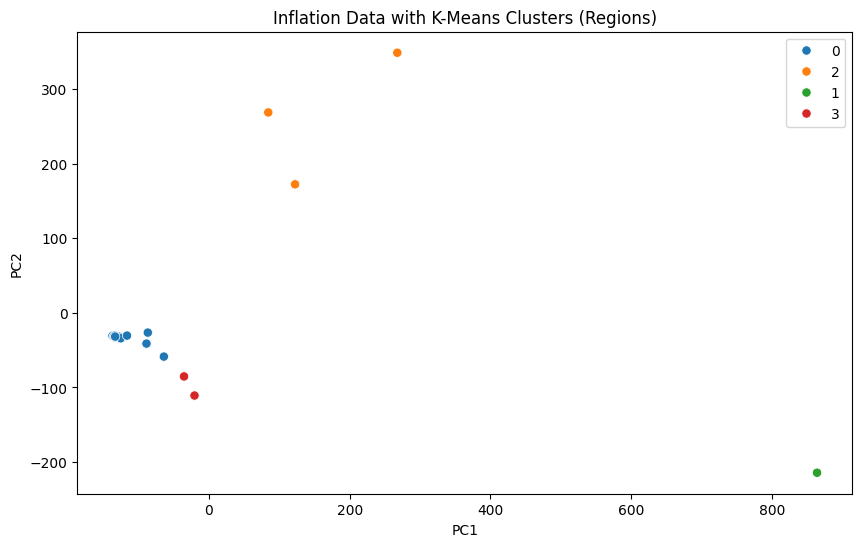

In [36]:
import seaborn as sns

kmeans = KMeans(n_clusters=4, random_state=seed)
labels = kmeans.fit_predict(subregions_inflation_pca)

plt.figure(figsize=(10,6))
plt.title('Inflation Data with K-Means Clusters (Regions)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')

sns.scatterplot(x=subregions_inflation_pca[:, 0],y=subregions_inflation_pca[:, 1], hue=labels.astype(str),s=45,legend="full")

plt.show()

Printing which cluster each subregion belongs to

In [37]:
for region, label in zip(subregions_inflation.index, labels):
  print(f"{region}: {label}")

AUSTRALIA AND NEW ZEALAND: 0
CENTRAL ASIA: 2
EASTERN ASIA: 0
EASTERN EUROPE: 1
LATIN AMERICA AND THE CARIBBEAN: 3
MELANESIA: 0
MICRONESIA: 0
NORTHERN AFRICA: 0
NORTHERN AMERICA: 0
NORTHERN EUROPE: 0
POLYNESIA: 0
SOUTH-EASTERN ASIA: 0
SOUTHERN ASIA: 0
SOUTHERN EUROPE: 3
SUB-SAHARAN AFRICA: 2
WESTERN ASIA: 2
WESTERN EUROPE: 0


## **5. Primary Analysis: ML 3**

#### Predicting 2024 inflation rates



**We want to use Random Forest to predict 2024 inflation rates and test them against the 2024 data. This model was used to handle data of different scales, non-linear data, better accuracy considering outliers and noise, and good with categorial and numerical data combined.** \\
**To prep, none of the datasets we used for the previous parts of the project had 2024 data and some not having 2022-2023 data. I manually added inflation and GDP data. It was hard to get CPI data for all countries in the list, so decided to stick with inflation rates and GDP.
Features: region, year, 2023 inflation, GDP (log scale)**

Random Forest Code Help: https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/ \\
Random Forest Help: https://builtin.com/data-science/random-forest-algorithm

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load dataset
df_inflationGDP = pd.read_csv('/content/sample_data/inflationGDP.csv')

# Create log-transformed GDP
df_inflationGDP['log_GDP'] = np.log1p(df_inflationGDP['GDP'])

# Create lag feature: previous year's inflation per country
df_inflationGDP = df_inflationGDP.sort_values(by=['country_name', 'year'])
df_inflationGDP['lag_inflation'] = df_inflationGDP.groupby('country_name')['inflation_rate'].shift(1)

# Drop rows with missing lagged inflation
df_inflationGDP = df_inflationGDP.dropna(subset=['lag_inflation'])

# Split data
train_df = df_inflationGDP[df_inflationGDP['year'] < 2024]
test_df = df_inflationGDP[df_inflationGDP['year'] == 2024]

# Define features and target
features = ['sub_region', 'log_GDP', 'year', 'lag_inflation']
target = 'inflation_rate'

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Preprocessing: OneHotEncode sub_region, scale numerics
preprocessor = ColumnTransformer(
    transformers=[
        ('region_enc', OneHotEncoder(handle_unknown='ignore'), ['sub_region']),
        ('num', StandardScaler(), ['log_GDP', 'year', 'lag_inflation'])
    ]
)

# Random Forest Model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train
model.fit(X_train, y_train)

# Predict and evaluate
test_df['predicted_inflation'] = model.predict(X_test)

r2 = r2_score(y_test, test_df['predicted_inflation'])
mae = mean_absolute_error(y_test, test_df['predicted_inflation'])
rmse = np.sqrt(mean_squared_error(y_test, test_df['predicted_inflation']))

print(f"Overall R² Score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")
print(test_df[['country_name', 'predicted_inflation', 'inflation_rate']])


Overall R² Score: 0.636
Mean Absolute Error: 4.368
Root Mean Squared Error: 14.117
     country_name  predicted_inflation  inflation_rate
12        Albania             2.020000             2.8
64        Algeria             6.847105             7.5
38         Angola            14.662904            22.0
77      Argentina           177.478703           118.0
90        Armenia             1.957000             2.5
...           ...                  ...             ...
1910      Vanuatu             3.525000             3.5
1923    Venezuela           196.311184           180.0
1936      Vietnam             3.176000             3.0
1949       Zambia             6.737586             7.0
1962     Zimbabwe           210.232129           100.0

[151 rows x 3 columns]


## **6. Visualization: ML 3**

We can construct a graph between the actual and predicted inflation rates.

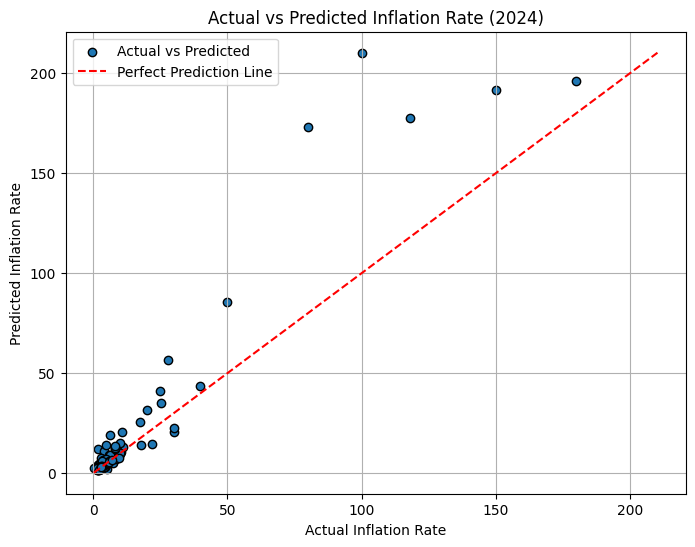

In [39]:
import matplotlib.pyplot as plt

# Creating the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(test_df['inflation_rate'], test_df['predicted_inflation'], edgecolors='k', label='Actual vs Predicted')

# Plotting a diagonal line to show a perfect prediction
min_val = min(test_df['inflation_rate'].min(), test_df['predicted_inflation'].min())
max_val = max(test_df['inflation_rate'].max(), test_df['predicted_inflation'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction Line')

# Setting labels and title for the plot
plt.xlabel('Actual Inflation Rate')
plt.ylabel('Predicted Inflation Rate')
plt.title('Actual vs Predicted Inflation Rate (2024)')
plt.grid(True)
plt.legend()

# Displaying the plot
plt.show()


We can see that the Random Forest model was fairly accurate for smaller inflation rate values, but lost accuracy for larger inflation rate values.

Additionaly, we can visualize predicted inflation rates across the world by plotting predicted inflation rate by country on a map.

In [47]:
import plotly
import plotly.express as px
plotly.offline.init_notebook_mode(connected=True)

# Creating the plot
fig = px.choropleth(
    test_df,
    # We can only plot data for countries we have data for
    # If a country has no data, it will appear gray on the map
    locations="country_name",
    locationmode="country names",
    color="predicted_inflation",
    title="Predicted Inflation Rates by Country (2024)",
    color_continuous_scale="YlOrRd"
)

# Displaying the plot
fig.show()

## **7. Insights and Conclusions**

Inflation is a reflection of the state of the economy throughout history. Looking at inflation rates can highlight economic recessions and correlate to other economic measures like GDP. Through the data science pipeline, we have observed the role that inflation plays in the economy.

Each analysis has its own conclusions about the data. Overall, there is a small correlation between inflation rate and GDP but no correlation between CPI and inflation. Additionally, countries can have similar inflation trends but also be affected differently by the recession. Throughout the notebook there are links to help an uninformed reader better understand. Through our analysis, an informed reader may learn more about the global inflation rate and the general economic state of the world.